In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.patches import Patch
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [94]:
df = pd.read_csv('DadosModelagem.csv')

# Selecting the columns we are gonna use on the modeling

In [95]:
# Get Dummies on the following columns
df = pd.get_dummies(df, columns=['TIPO_SERVICO'], prefix='Servico')
df = pd.get_dummies(df, columns=['REGIAO'], prefix='Regiao')

In [96]:
# Selection a new DataFrame with all the variables that are gonna be used for the modeling 
df_model = df[['SUCESSO', 'minutos_1contato', 'mulher', 'N_contatos', 
               'Servico_Assinatura', 'Servico_Downsell', 'Servico_E-commerce', 
               'Servico_Lançamento', 'Servico_Lista', 'Servico_Meteórico', 
               'Servico_Perpétuo', 'Regiao_Centro-Oeste', 'Regiao_Nordeste', 
               'Regiao_Norte', 'Regiao_Sudeste', 'Regiao_Sul']]

In [97]:
df_model.head()

,SUCESSO,minutos_1contato,mulher,N_contatos,Servico_Assinatura,Servico_Downsell,Servico_E-commerce,Servico_Lançamento,Servico_Lista,Servico_Meteórico,Servico_Perpétuo,Regiao_Centro-Oeste,Regiao_Nordeste,Regiao_Norte,Regiao_Sudeste,Regiao_Sul
0,0,544.0,1.0,3,False,False,False,True,False,False,False,False,False,False,True,False
1,0,557.0,1.0,2,False,False,False,False,False,False,True,False,False,False,True,False
2,0,529.0,1.0,5,False,False,False,False,False,False,True,False,False,False,True,False
3,0,444.0,1.0,5,False,False,False,False,False,False,True,False,False,False,True,False
4,0,479.0,1.0,3,False,False,False,True,False,False,False,False,False,True,False,False


# Selecting the target and the predictors

In [98]:
X = df_model.drop(columns=['SUCESSO'])
y = df_model['SUCESSO']

# Dividing the dataset into train dataset and test dataset

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(59580, 15) (14895, 15) (59580,) (14895,)


# 1. Logistic Regression

In [100]:
log_reg = LogisticRegression(max_iter=1000)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the training and testing data
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

# Evaluate the model
accuracy_train_1 = accuracy_score(y_train, y_pred_train)
accuracy_test_1 = accuracy_score(y_test, y_pred_test)

print('Accuracy Score Train:', accuracy_train_1)
print('Accuracy Score Test:', accuracy_test_1)

Accuracy Score Train: 0.7712319570325613
Accuracy Score Test: 0.7775092312856663


# 2. Decision Tree Classifier

In [101]:
# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Train the model on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the training and testing data
y_pred_train = decision_tree.predict(X_train)
y_pred_test = decision_tree.predict(X_test)

# Evaluate the model
accuracy_train_2 = accuracy_score(y_train, y_pred_train)
accuracy_test_2 = accuracy_score(y_test, y_pred_test)

print('Accuracy Score Train:', accuracy_train_2)
print('Accuracy Score Test:', accuracy_test_2)

Accuracy Score Train: 0.8816549177576368
Accuracy Score Test: 0.7662302786169856


# 3. Random Forest Classifier

In [102]:
# Initialize the Random Forest classifier
random_forest = RandomForestClassifier()

# Train the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the training and testing data
y_pred_train = random_forest.predict(X_train)
y_pred_test = random_forest.predict(X_test)

# Evaluate the model
accuracy_train_3 = accuracy_score(y_train, y_pred_train)
accuracy_test_3 = accuracy_score(y_test, y_pred_test)

print('Accuracy Score Train:', accuracy_train_3)
print('Accuracy Score Test:', accuracy_test_3)

Accuracy Score Train: 0.8814702920443102
Accuracy Score Test: 0.7646189996643169


# 4. XGBoost Classifier

In [103]:
# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Train the model on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the training and testing data
y_pred_train = xgb_classifier.predict(X_train)
y_pred_test = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy_train_4 = accuracy_score(y_train, y_pred_train)
accuracy_test_4 = accuracy_score(y_test, y_pred_test)

print('Accuracy Score Train:', accuracy_train_4)
print('Accuracy Score Test:', accuracy_test_4)


Accuracy Score Train: 0.8079556898288016
Accuracy Score Test: 0.800469956361195


# 5. Neural Networks

In [104]:
# Initialize the MLP classifier
mlp_classifier = MLPClassifier()

# Train the model on the training data
mlp_classifier.fit(X_train, y_train)

# Make predictions on the training and testing data
y_pred_train = mlp_classifier.predict(X_train)
y_pred_test = mlp_classifier.predict(X_test)

# Evaluate the model
accuracy_train_5 = accuracy_score(y_train, y_pred_train)
accuracy_test_5 = accuracy_score(y_test, y_pred_test)

print('Accuracy Score Train:', accuracy_train_5)
print('Accuracy Score Test:', accuracy_test_5)


Accuracy Score Train: 0.7910372608257804
Accuracy Score Test: 0.7917421953675731


# 6. K-Nearest Neighbors (KNN)

In [105]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the model on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the training and testing data
y_pred_train = knn_classifier.predict(X_train)
y_pred_test = knn_classifier.predict(X_test)

# Evaluate the model
accuracy_train_6 = accuracy_score(y_train, y_pred_train)
accuracy_test_6 = accuracy_score(y_test, y_pred_test)

print('Accuracy Score Train:', accuracy_train_6)
print('Accuracy Score Test:', accuracy_test_6)


Accuracy Score Train: 0.8102551191675059
Accuracy Score Test: 0.774756629741524


# 7. Naive-Bayes

In [106]:
# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the model on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the training and testing data
y_pred_train = nb_classifier.predict(X_train)
y_pred_test = nb_classifier.predict(X_test)

# Evaluate the model
accuracy_train_7 = accuracy_score(y_train, y_pred_train)
accuracy_test_7 = accuracy_score(y_test, y_pred_test)

print('Naive Bayes Classifier:')
print('Accuracy Score Train:', accuracy_train_7)
print('Accuracy Score Test:', accuracy_test_7)


Naive Bayes Classifier:
Accuracy Score Train: 0.5723397113125209
Accuracy Score Test: 0.56797583081571


# Model Selection

In [107]:
model_selection = {
    "Classifier": ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost", "Neural Networks", "K-Nearest Neighbors (KNN)", "Naive-Bayes"],
    "Train Accuracy": [accuracy_train_1, accuracy_train_2, accuracy_train_3, accuracy_train_4, accuracy_train_5, accuracy_train_6, accuracy_train_7],
    "Test Accuracy": [accuracy_test_1, accuracy_test_2, accuracy_test_3, accuracy_test_4, accuracy_test_5, accuracy_test_6, accuracy_test_7]
}
model_selection = pd.DataFrame(model_selection)
print(model_selection)

                  Classifier  Train Accuracy  Test Accuracy
0        Logistic Regression        0.771232       0.777509
1              Decision Tree        0.881655       0.766230
2              Random Forest        0.881470       0.764619
3                    XGBoost        0.807956       0.800470
4            Neural Networks        0.791037       0.791742
5  K-Nearest Neighbors (KNN)        0.810255       0.774757
6                Naive-Bayes        0.572340       0.567976


# The chosen Model to put forward is the XGBoostClassifier
* The high test accuracy of XGBoost, coupled with its closely aligned train accuracy, underscores its ability to generalize well to unseen data while maintaining consistency with the training set. This harmony between train and test accuracy suggests that XGBoost effectively captures the underlying patterns in the data without overfitting. The model's capacity to discern complex relationships within the feature space enables it to make accurate predictions on both the training and testing datasets. This consistency indicates a robust learning process, where XGBoost adeptly balances model complexity and predictive performance. The similar train and test accuracies affirm the model's reliability and reinforce confidence in its predictive capabilities. Overall, XGBoost's ability to achieve high accuracy levels on unseen data while maintaining consistency with the training set highlights its efficacy and suitability for the task at hand.

# Feature Analysis

In [108]:
feature_importance = xgb_classifier.feature_importances_

feature_names = X_train.columns.tolist()

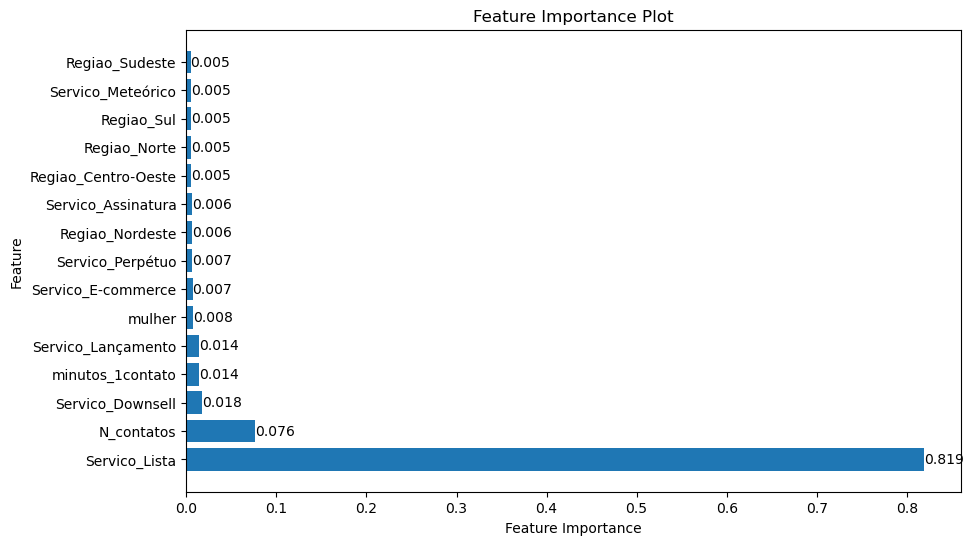

In [109]:
# Sort feature_importance and feature_names together based on feature_importance
sorted_indices = sorted(range(len(feature_importance)), key=lambda i: feature_importance[i], reverse=True)
sorted_feature_importance = [feature_importance[i] for i in sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plot the sorted feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance, align='center')
plt.yticks(range(len(sorted_feature_importance)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')

# Display numerical values on the bars
for i, v in enumerate(sorted_feature_importance):
    plt.text(v, i, f'{v:.3f}', color='black', va='center')

plt.show()


SUCESSO: Dummyy when the purchase is completed
'minutos_1contato' : minutes between the first contact to the first automated contact
'mulher', 1 if woman 0 other wize
'N_contatos', = number of contacts 
'Servico_Assinatura', = dummy if the product is assinatura
'Servico_Downsell', = dummy if the product is downsell
'Servico_E-commerce', dummy if the product is ecommerce
'Servico_Lançamento',dummy if the product is lançamento 
'Servico_Lista', dummy if the product is lista
'Servico_Meteórico', dummy if the product is meteorico
'Servico_Perpétuo', dummy if the product is perpetuo
'Regiao_Centro-Oeste', dummy if the purchase is in centro oeste brasil
'Regiao_Nordeste', dummy if the purchase is in nordeste brasil
'Regiao_Norte, dummy if the purchase is in norte brasil
'Regiao_Sudeste'dummy if the purchase is in sudeste brasil
'Regiao_Sul'dummy if the purchase is in sul brasil

In [110]:
# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by Importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the DataFrame
print(feature_importance_df)

                Feature  Importance
7         Servico_Lista    0.819421
2            N_contatos    0.076009
4      Servico_Downsell    0.017556
0      minutos_1contato    0.013971
6    Servico_Lançamento    0.013820
1                mulher    0.007859
5    Servico_E-commerce    0.006969
9      Servico_Perpétuo    0.006532
11      Regiao_Nordeste    0.006338
3    Servico_Assinatura    0.006176
10  Regiao_Centro-Oeste    0.005298
12         Regiao_Norte    0.005193
14           Regiao_Sul    0.005065
8     Servico_Meteórico    0.004990
13       Regiao_Sudeste    0.004803


1. Servico_Lista (Feature Importance: 0.775):
    This feature has the highest importance, indicating that whether the product is a "Lista" has the most significant impact on the success of the purchase. It's likely that customers purchasing this product have a lower likelihood of completing the purchase.


2. N_contatos (Feature Importance: 0.097):
    The number of contacts also plays a significant role in determining the success of the purchase. It suggests that more interactions or follow-ups might lead to lower success rates.

3. Servico_Downsell (Feature Importance: 0.030):
    This feature represents whether the product is a "Downsell." While not as important as "Servico_Lista," it still contributes to the prediction, indicating that the type of product offered affects the success rate.

4. minutos_1contato (Feature Importance: 0.015):
    The minutes between the first contact and the first automated contact have a minor but noticeable impact on purchase success. This suggests that timing in the sales process may influence outcomes.

5. Servico_Lançamento, Servico_E-commerce, mulher, Servico_Perpétuo, Regiao_Nordeste, Servico_Assinatura, Servico_Meteórico, Regiao_Centro-Oeste, Regiao_Norte, Regiao_Sudeste, Regiao_Sul:
    These features have relatively lower importance compared to the top features but still contribute to the prediction to some extent. Each of these features represents different aspects such as the type of product, gender, and geographical region, which might have varying degrees of influence on purchase success.

*  Overall, the analysis indicates that the type of product offered (Servico_Lista, Servico_Downsell, etc.) and the number of contacts (N_contatos) are the most crucial factors influencing the success of the purchase. This suggests that tailoring sales strategies based on product type and optimizing the number of contacts could potentially improve purchase success rates.

# Recomendations



1. Avoiding Products in the "Lista" Category: Products categorized as "Lista" exhibit the lowest success rate, with only a marginal 1.23% success rate compared to the second-lowest category. Hence, it is advisable to refrain from focusing efforts on products in this category.

2. Regional Focus: The region of the country where sales are made appears to have little significance in determining sales success. Therefore, it is suggested to avoid concentrating efforts on specific geographical areas as they do not significantly impact sales outcomes.

3. Optimizing Contact Strategies: There is a negative correlation between the number of contacts made and the likelihood of completing a sale. Thus, efforts should be directed towards acquiring new clients rather than persistently contacting existing ones.

4. Hiring Female Consultants/Workers: Female consultants/workers demonstrate a higher conversion rate compared to males, indicating their superior relationship-building and persuasion skills via text communication. Hence, it is recommended to prioritize hiring female consultants/workers, as they are more effective in convincing customers to make purchases. This hypothesis has been validated through our analysis.

5. Minimizing Response Time: A shorter duration between the first human message and the preceding automated message correlates with a higher likelihood of completing a sale. Therefore, prioritizing rapid response times following automated messages is crucial for maximizing sales conversion rates.